# 2.1 Manufacturers and Rating

<b>Compare the distribution of cereal ratings by manufacturer</b>

In [244]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from matplotlib.pyplot import figure
%matplotlib inline

df = pd.read_csv('cereal.csv') # Reading the .csv file, in the variable df (dataframe)

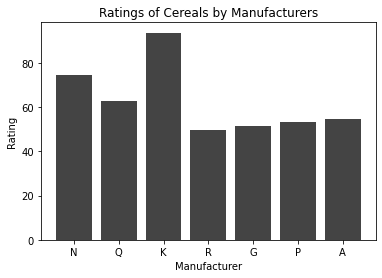

In [245]:
#Distribution of cereal ratings by manufacturer
mfr= df['mfr']        #Manufacturers
rating = df['rating'] #Ratings

plt.bar(mfr, rating, color='#444444')
plt.title('Ratings of Cereals by Manufacturers') #Bar chart title
plt.xlabel('Manufacturer')   #X axis label
plt.ylabel('Rating')         #Y axis label
plt.show()

[]

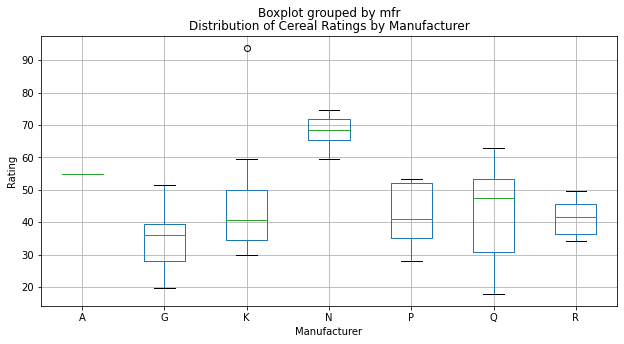

In [246]:
#Visualise cereal rating distribution of manufacturers

#Create a boxplot showing raiting of each manufacturer
boxplot = df.boxplot(column=['rating'],by="mfr", figsize=(10,5)) 

#Set title and axis labels
boxplot.set_title('Distribution of Cereal Ratings by Manufacturer')
boxplot.set_ylabel('Rating')
boxplot.set_xlabel('Manufacturer')
boxplot.plot()

In [247]:
#Average ratings of cereal manufacturers

ratings = df.groupby('mfr')['rating'] #new dataframe just containing the manufacturer and their ratings
ratingsMean = ratings.mean()   #calculate mean of ratings for each manufacturer

print("Average Ratings of Cerial Manufacturers\n\n", (ratingsMean.sort_values(ascending=False)).round(2)) 
#Display the means in descending order, rounded to 2 decimal places

Average Ratings of Cerial Manufacturers

 mfr
N    67.97
A    54.85
K    44.04
Q    42.92
P    41.71
R    41.54
G    34.49
Name: rating, dtype: float64


<b>Q1. What is the manufacturer with the highest average rating?</b>

A1. As shown above, the manufacturer N has the highest average rating with 67.97

# 2.2 Features as Predictors of Rating

<b>What are the cereal (numerical) features that are stronger predictors of cereal rating?</b>

In [248]:
#Predictor strength
df = pd.read_csv('cereal.csv') #Import again

#Assign all independent numerical variables to X
X = df[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups']]
y = df['rating']  #Dependant variable

#Perform multiple linear regression
regr = linear_model.LinearRegression()
regr.fit(X, y)    

#Assigning variables to be used to output data in text and graph
xAxis = ('calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups')
yAxis = regr.coef_

#Print predictor strength for all variables
print("Prediction Strength of Variables")
for j, label in enumerate(xAxis):
    print(xAxis[j],":",yAxis[j].round(3))



Prediction Strength of Variables
calories : -0.223
protein : 3.273
fat : -1.691
sodium : -0.054
fiber : 3.443
carbo : 1.092
sugars : -0.725
potass : -0.034
vitamins : -0.051
shelf : -0.0
weight : -0.0
cups : 0.0


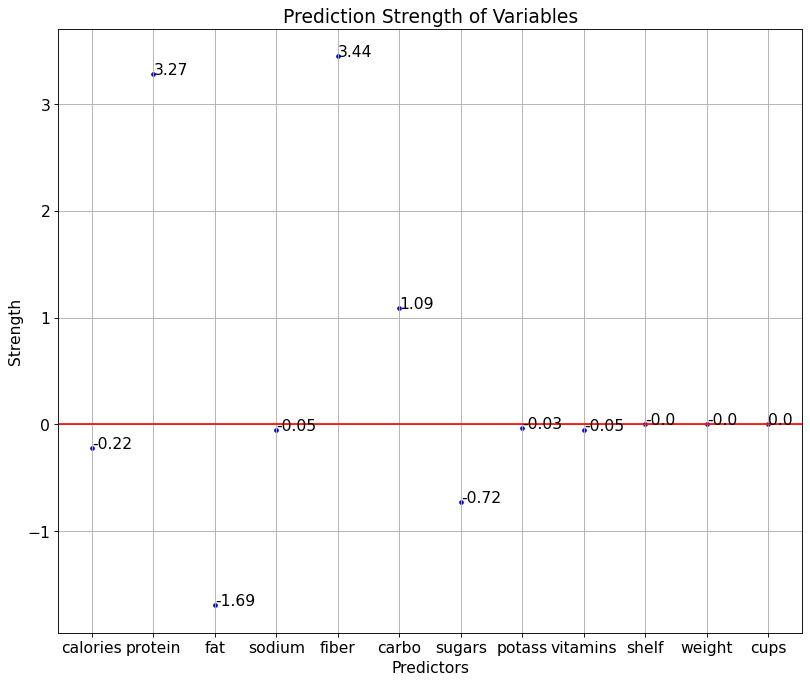

In [249]:
#Prediction strength scatterplot
plt.rc('font', size=14)
figure(figsize=(12, 10), dpi=80)
plt.axhline(y=0.0, color='r', linestyle='-')   #Line through zero
plt.title("Prediction Strength of Variables")
plt.xlabel('Predictors')   
plt.ylabel('Strength')   

#Print label on each plot
for i, label in enumerate(xAxis):
    plt.annotate((yAxis[i].round(2)), (xAxis[i], yAxis[i]))

#Create scatterplot
plt.scatter(xAxis, yAxis, s=10, color="blue", alpha=1)
plt.grid()
plt.show()

The top 3 strongest predictors are 
1. Fiber:   3.44
2. Protein: 3.27
3. Fat:    -1.69

<b>Q2. How do the top features relate to rating (positively i.e., an increase in them increase the rating; or negatively, i.e. an increase in them decrease the rating?)</b>

A2. The top 2 features (fiber, protein) relate positively to the rating, and the 3rd top feature (fat) relates negatively to the rating.